# Import Librairies

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import tensorflow as tf


# Variables globales
path = "IMMI/"
img_pth = "IMMI/subject-1-T1.img"

os.getcwd()
img_pth = "IMMI/subject-1-T1.img"
assert os.path.exists(img_pth)

# Chargement de toutes les images du datatset

In [2]:
def load_all_images(path):
  """
    Charge toutes les images (.img) du répertoire spécifié et les ajoute à une liste.
    
    Args:
        path (str): Le chemin du répertoire contenant les images.
        
    Returns:
        img_list (list): Liste des tableaux numpy des images chargées.
    """
  img_list = []
  for files in os.listdir(path):
    if files.endswith(".img"):
      image = nib.load(os.path.join(path, files)).get_fdata()[:,:,:,0]
      image_array = np.array(image)
      img_list.append(image_array)
  return img_list

list_img = load_all_images(path)


# Affichage des figures

In [3]:
patient_filenames = {
    "patient 1": ["subject-1-label.img", "subject-1-T1.img", "subject-1-T2.img"],
    "patient 2": ["subject-2-label.img", "subject-2-T1.img", "subject-2-T2.img"],
    "patient 3": ["subject-3-label.img", "subject-3-T1.img", "subject-3-T2.img"],
    "patient 4": ["subject-4-label.img", "subject-4-T1.img", "subject-4-T2.img"],
    "patient 5": ["subject-5-label.img", "subject-5-T1.img", "subject-5-T2.img"],
    "patient 6": ["subject-6-label.img", "subject-6-T1.img", "subject-6-T2.img"],
    "patient 7": ["subject-7-label.img", "subject-7-T1.img", "subject-7-T2.img"],
    "patient 8": ["subject-8-label.img", "subject-8-T1.img", "subject-8-T2.img"],
    "patient 9": ["subject-9-label.img", "subject-9-T1.img", "subject-9-T2.img"],
    "patient 10": ["subject-10-label.img", "subject-10-T1.img", "subject-10-T2.img"]
}

def print_figures(dict):
  """
    Affiche les tranches médianes des images de chaque patient pour toutes les modalités.
    
    Args:
        dict (dict): Dictionnaire contenant les noms des fichiers des patients avec le nom des fichiers correspondants.
    """
  fig_size = (10, 10)
  for patient, filenames in dict.items():
      fig, axs = plt.subplots(3, 3, figsize=fig_size)

      for i, modality in enumerate(["VT", "T1", "T2"]):
          for j, axis in enumerate(["x", "y", "z"]):
              
              image_path = os.path.join(path, filenames[i])
              image = nib.load(image_path).get_fdata()[:,:,:,0]
              axis_index = int(image.shape[j] / 2)
              
              if j == 0:
                  image_slice = image[axis_index, :, :]
              elif j == 1:
                  image_slice = image[:, axis_index, :]
              else:
                  image_slice = image[:, :, axis_index]
              axs[i, j].imshow(image_slice)
              axs[i, j].set_title(f"{modality} {axis} médian")
              
      fig.suptitle(f"IRM de cerveau pour " + patient)
      plt.show()
      print("\n------------------------------------------------------------------------------\n")

#print_figures(patient_filenames)

Normalisation d'une image :

In [4]:
def normalize_image(image):
    """
    Normalise l'image en utilisant la moyenne et l'écart-type des valeurs supérieures à 0.
    
    Args:
        image (np.array): Le tableau numpy de l'image à normaliser.
        
    Returns:
        np.array: L'image normalisée.
    """
    image_pos = image[image > 0]
    mu = np.mean(image_pos) 
    sigma = np.std(image_pos)
    return ((image - mu) / sigma)

In [5]:
def process_patient_data(data_path, patient_range, display=True):
    """
    Charge et traite les données des patients, y compris le chargement des images T1, T2 et VT, 
    la normalisation des images T1 et T2, et l'affichage des images si demandé.
    
    Args:
        data_path (str): Le chemin du répertoire contenant les données des patients.
        patient_range (range): La plage des numéros des patients à traiter.
    display (bool): Si True, affiche les images médianes des patients pour toutes les modalités.
    Returns:
        images_patient (dict): Dictionnaire contenant les données traitées des patients.
    """
    images_patient = {}
    
    # Boucle sur tous les patients
    for patient in patient_range:
        pat = {}
        
        # Charger les images T1, T2 et VT
        t1_img = nib.load(os.path.join(data_path, "subject-" + str(patient) + "-T1.img")).get_fdata()[:,:,:,0]
        t2_img = nib.load(os.path.join(data_path, "subject-" + str(patient) + "-T2.img")).get_fdata()[:,:,:,0]
        vt_img = nib.load(os.path.join(data_path, "subject-" + str(patient) + "-label.img")).get_fdata()[:,:,:,0]
        pat["vt_pasnormalisée_img_pt" + str(patient)] = vt_img

        x, y, z = vt_img.shape

        # Normaliser les images T1 et T2
        t1_norm = normalize_image(t1_img).reshape(x, y, z)
        t2_norm = normalize_image(t2_img).reshape(x, y, z)
        
        # Afficher les images normalisées
        if (display):
          fig, axs = plt.subplots(3, 3, figsize=(10, 10))
          axs[0][0].imshow(t1_norm[int(t1_norm.shape[0]/2), :, :])
          axs[0][0].set_title('T1 x median patient '+ str(patient))
          axs[0][1].imshow(t1_norm[:, int(t1_norm.shape[1]/2), :])
          axs[0][1].set_title('T1 y median patient '+ str(patient))
          axs[0][2].imshow(t1_norm[:, : , int(t1_norm.shape[2]/2)])
          axs[0][2].set_title('T1 z median patient '+ str(patient))
          
          axs[1][0].imshow(t2_norm[int(t2_norm.shape[0]/2), :, :])
          axs[1][0].set_title('T2 x median patient '+ str(patient))
          axs[1][1].imshow(t2_norm[:, int(t2_norm.shape[1]/2), :])
          axs[1][1].set_title('T2 y median patient '+ str(patient))
          axs[1][2].imshow(t2_norm[:, : , int(t2_norm.shape[2]/2)])
          axs[1][2].set_title('T2 z median patient '+ str(patient))

          axs[2][0].imshow(vt_img[int(vt_img.shape[0]/2), :, :])
          axs[2][0].set_title('VT x median patient '+ str(patient))
          axs[2][1].imshow(vt_img[:, int(vt_img.shape[1]/2), :])
          axs[2][1].set_title('VT y median patient '+ str(patient))
          axs[2][2].imshow(vt_img[:, : , int(vt_img.shape[2]/2)])
          axs[2][2].set_title('VT z median patient '+ str(patient))

        #Ajouter les images dans le dictionnaire
        vt_img = np.array(vt_img).reshape(x, y, z)
        vt_img = np.clip(vt_img, 0, 1).reshape(x, y, z)
        pat["t1_img_pt" + str(patient)] = t1_norm
        pat["t2_img_pt" + str(patient)] = t2_norm
        pat["vt_img_pt" + str(patient)] = vt_img
        images_patient["patient" + str(patient)] = pat
    return images_patient

patient_range = range(1, 11)
training_patients = list(range(1, 7))
validation_patients = list(range(7, 9))
test_patients = list(range(9, 11))

images_patient = process_patient_data(path, patient_range, display=False)


# Affichage dictionnaire données

In [6]:
def print_dict():
    for patient, variables in images_patient.items():
        print("Patient", patient[6:], ":")
        for variable, valeur in variables.items():
            print(variable, " shape=", valeur.shape)

#print_dict()

# Formatage des données en mode 2D pour l'étage 1

In [7]:
# Initialiser les compteurs pour les ensembles d'entraînement et de validation
sum_train = 0
sum_vali = 0

"""
Afin d'améliorer les performances du réseau de neurones, j'ai décidé d'augmenter la taille de mes ensembles d'entraînement en réduisant le seuil de pixels colorés minimum requis pour sélectionner une coupe. 
En abaissant ce seuil, davantage de coupes sont disponibles pour l'entraînement, permettant ainsi un apprentissage plus efficace et robuste pour le réseau.
J'ai donc hcoisi d'augmenter la taille de toutes mes données d'entrainemnt pour chaque cascade de l'apprentissage
"""

def get_nombrecoupes(sum_train, sum_vali, display=True):
    """
    Fonction qui sert à calculer le nombre de coupes pour les ensembles d'entraînement et de validation
    
    Args:
        sum_train (int): La somme de coupes de train
        sum_vali (int): La somme de coupes de validation
        display (bool): Booléan pour savoir si il faut afficher les résultats, True si non précisé
    Return:
        Tupple: SumTrain et SumVali
    """
    numero_patient = 1
    for patient, val in images_patient.items():
        nb_coupes = 0

        # Si le patient fait partie de l'ensemble d'entraînement
        if numero_patient in training_patients:
            img = val["vt_img_pt" + patient[-1]]
            for z in range(0, img.shape[2]):
                slice = img[:,:,z]
                if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
                    nb_coupes += 1
            sum_train += nb_coupes
            if (display):
                print(nb_coupes)

        # Si le patient fait partie de l'ensemble de validation
        elif numero_patient in validation_patients:
            img = val["vt_img_pt" + patient[-1]]
            for z in range(0, img.shape[2]):
                slice = img[:,:,z]
                if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
                    nb_coupes += 1
            sum_vali += nb_coupes
            if (display):
                print(nb_coupes)
                
        numero_patient += 1

    if (display):
        print("---training---")
        print("total = ", sum_train)
        print("---validation---")
        print("total = ", sum_vali)
        
    return (sum_train, sum_vali)

# Récupérer la taille des images
x, y = images_patient["patient1"]["vt_img_pt1"][:,:,0].shape

# Calculer le nombre de coupes pour les ensembles d'entraînement et de validation
(sum_train, sum_vali) = get_nombrecoupes(sum_train, sum_vali, display=False)

In [8]:
xtrain = np.zeros((sum_train, x, y, 2))
ytrain = np.zeros((sum_train, x, y, 1))

xtrain_val = np.zeros((sum_vali, x, y, 2))
ytrain_val = np.zeros((sum_vali, x, y, 1))

def load_(val, patient):
  """
    Fonction pour charger les images pour un patient spécifique
    
    Args:
        val (dict): Les images de tout les patients
        patient (int): Le numéro du patient
    Return:
        Tupple: Les trois images du patient choisis
    """
  vt = np.copy(val["vt_pasnormalisée_img_pt" + str(patient)])
  t1 = np.copy(val["t1_img_pt" + str(patient)])
  t2 = np.copy(val["t2_img_pt" + str(patient)])
  return (vt, t1, t2)


def prepare_train1(xtrain, ytrain, xtrain_val, ytrain_val):
  """
    Fonction pour préparer les ensembles d'entraînement et de validation
    
    Args:
        xtrain (np.array): Ensemble d'entrainement avec les images T1 et T2 de l'ensemble de train
        ytrain (np.array): Ensemble d'entrainement avec les images VT de l'ensemble de train
        xtrain_val (np.array): Ensemble d'entrainement avec les images T1 et T2 de l'ensemble de validation
        ytrain_val (np.array): Ensemble d'entrainement avec les images VT de l'ensemble de validation
    Return:
        Tupple: Les quatres ensembles remplis.
    """
  numero_patient = 1
  num_coupe = 0
  num_coupe_val = 0
  for patient, val in images_patient.items():
    if numero_patient in training_patients:
      (vt, t1, t2) = load_(val, patient[-1])
      for z in range(0, vt.shape[2]):
        slice = vt[:,:,z]
        if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
            xtrain[num_coupe,:,:,0] = t1[:,:,z]
            xtrain[num_coupe,:,:,1] = t2[:,:,z]
            ytrain[num_coupe,:,:,0] = np.where(vt[:,:,z]>0,1,0)
            num_coupe += 1
            
    if numero_patient in validation_patients:
      (vt, t1, t2) = load_(val, patient[-1])
      for z in range(0, vt.shape[2]):
        slice = vt[:,:,z]
        if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
            xtrain_val[num_coupe_val,:,:,0] = t1[:,:,z]
            xtrain_val[num_coupe_val,:,:,1] = t2[:,:,z]
            ytrain_val[num_coupe_val,:,:,0] = np.where(vt[:,:,z]>0,1,0)
            num_coupe_val += 1

    numero_patient += 1

# Préparer les ensembles d'entraînement et de validation en utilisant la fonction prepare_train1
prepare_train1(xtrain, ytrain, xtrain_val, ytrain_val)



# Model

In [9]:
#model
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
from keras.callbacks import EarlyStopping
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
nbf64 = 8

def unet(pretrained_weights = None,input_size = (x,y,2)):
    inputs = Input(input_size)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512 / nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256 / nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128 / nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128 / nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(nbf64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(nbf64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    return model

# Paramètres entrainements

In [10]:
def gpu_available():    
    gpus = tf.config.experimental.list_physical_devices('GPU')
    print("Dispositifs GPU disponibles:", [d for d in gpus])

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=1E-10, mode = 'min', verbose=1, restore_best_weights=True)
model_checkpoint1 = ModelCheckpoint('best_model1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
model_checkpoint2 = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
model_checkpoint3 = ModelCheckpoint('best_model3.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# Entrainement unet

In [ ]:
def print_graph_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.legend()

    plt.show()

Epoch 1/125
609/609 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9703
Epoch 1: val_loss improved from inf to 0.02371, saving model to best_model1.h5
609/609 [==============================] - 38s 61ms/step - loss: 0.0633 - accuracy: 0.9703 - val_loss: 0.0237 - val_accuracy: 0.9920
Epoch 2/125
609/609 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9967
Epoch 2: val_loss improved from 0.02371 to 0.01472, saving model to best_model1.h5
609/609 [==============================] - 36s 59ms/step - loss: 0.0087 - accuracy: 0.9967 - val_loss: 0.0147 - val_accuracy: 0.9945
Epoch 3/125
609/609 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9980
Epoch 3: val_loss improved from 0.01472 to 0.01029, saving model to best_model1.h5
609/609 [==============================] - 35s 58ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0103 - val_accuracy: 0.9961
Epoch 4/125
609/609 [==============================] - ETA: 0s - 

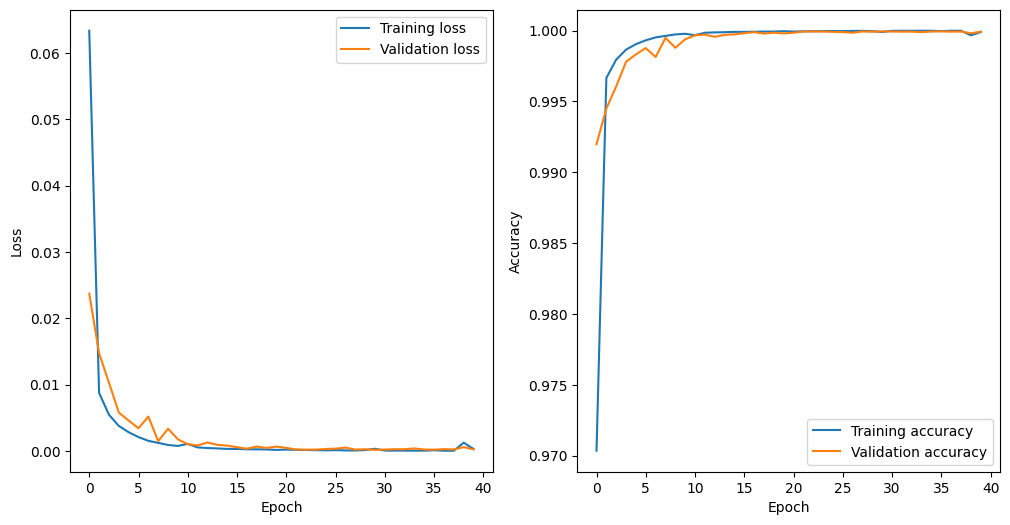

In [13]:
model = unet()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtrain_val, ytrain_val), epochs=125, batch_size=1, callbacks=[early_stopping, model_checkpoint1])

print_graph_history(history)

In [14]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2 * intersection) / (np.sum(y_true) + np.sum(y_pred))

def get_dice():
  dice_scores = []
  for patient, val in images_patient.items():
      if int(patient[-1]) in test_patients or (patient[-1] == '0' and patient[-2] == '1'):
          if (patient[-1] == '0' and patient[-2] == '1'):
            (vt, t1, t2) = load_(val, 10)
            vt = np.where(vt >= 10, 1, 0)
          else:
            (vt, t1, t2) = load_(val, patient[-1])
            vt = np.where(vt >= 10, 1, 0)
          x, y, z = vt.shape
    
          predictions = np.zeros((x, y, z))

          for count in range(0, z):
              input = np.zeros((1, x, y, 2))
              input[0, :, :, 0] = t1[:, :, count]
              input[0, :, :, 1] = t2[:, :, count]
              prediction = model.predict(input).reshape((x, y))
              thresholded_prediction = np.where(prediction > 0.5, 1, 0)
              predictions[:, :, count] = thresholded_prediction
              plt.show()
          dice_score = dice_coefficient(vt, predictions)
          dice_scores.append(dice_score)
  return dice_scores

dice_scores = get_dice()

for di in dice_scores:
  print("Dice score : " + str(di))

1/1 [==============================] - 0s 21ms/step
Dice score : 0.999944105448895
Dice score : 0.9999043161448105


# Création des données d'entrée pour l'étage 2 (WM + GM)

In [15]:
images_patient = process_patient_data(path, patient_range, display=False)

#xtrain et xval
xtrain_stage2 = np.zeros((sum_train, x, y, 3))
xtrain_val_stage2 = np.zeros((sum_vali, x, y, 3))

xtrain_stage2[:, :, :, : 2] = xtrain
xtrain_val_stage2[:, :, :, :2] = xtrain_val

xtrain_stage2[:, :, :, 2] = model.predict(xtrain).reshape(sum_train, x, y)
xtrain_val_stage2[:, :, :, 2] = model.predict(xtrain_val).reshape(sum_vali, x, y)

ytrain_stage2 = np.zeros((sum_train, x, y, 1))
ytrain_val_stage2 = np.zeros((sum_vali, x, y, 1))

#ytrain et yval
numero_patient = 1
num_coupe_val = 0
num_coupe = 0
for patient, val in images_patient.items():
  nb_coupes = 0
  if patient == "patient9":
    break
  (vt, t1, t2) = load_(val, patient[-1])
  for z in range(0, vt.shape[2]):
    slice = vt[:,:,z]
    if numero_patient in training_patients:
        if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
          ytrain_stage2[num_coupe,:,:,0] = np.where(slice>=150,1,0)
          num_coupe += 1
    elif numero_patient in validation_patients:
        if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
          ytrain_val_stage2[num_coupe_val,:,:,0] = np.where(slice>=150,1,0)
          num_coupe_val += 1

  numero_patient += 1
x,y,z = vt.shape

7/7 [==============================] - 1s 173ms/step


# Création et entraînement du deuxième U-Net pour prédire WM+GM

In [16]:
model_stage2 = unet(input_size=(x, y, 3))
rem_xtrain2 = np.copy(xtrain_stage2)
rem_xtrainval2 = np.copy(xtrain_val_stage2)

model_stage2.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history_stage2 = model_stage2.fit(xtrain_stage2, ytrain_stage2, validation_data=(xtrain_val_stage2, ytrain_val_stage2), epochs=100, batch_size=1, callbacks=[early_stopping, model_checkpoint2])

print_graph_history(history_stage2)

Epoch 1/100
608/609 [============================>.] - ETA: 0s - loss: 0.6862 - accuracy: 0.7705
Epoch 1: val_loss improved from inf to 0.67860, saving model to best_model2.h5
609/609 [==============================] - 31s 50ms/step - loss: 0.6862 - accuracy: 0.7707 - val_loss: 0.6786 - val_accuracy: 0.7788
Epoch 2/100
609/609 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.7781
Epoch 2: val_loss improved from 0.67860 to 0.66515, saving model to best_model2.h5
609/609 [==============================] - 30s 49ms/step - loss: 0.6719 - accuracy: 0.7781 - val_loss: 0.6651 - val_accuracy: 0.7789
Epoch 3/100
608/609 [============================>.] - ETA: 0s - loss: 0.6590 - accuracy: 0.7779
Epoch 3: val_loss improved from 0.66515 to 0.65270, saving model to best_model2.h5
609/609 [==============================] - 30s 49ms/step - loss: 0.6590 - accuracy: 0.7781 - val_loss: 0.6527 - val_accuracy: 0.7789
Epoch 4/100
608/609 [============================>.] - ETA: 0s - 

KeyboardInterrupt: 

In [ ]:
dice_scores = []
for patient, val in images_patient.items():
    if int(patient[-1]) in test_patients or (patient[-1] == '0' and patient[-2] == '1'):
        if (patient[-1] == '0' and patient[-2] == '1'):
          (vt, t1, t2) = load_(val, 10)
          vt = np.where(vt >= 150, 1, 0)
        else:
          (vt, t1, t2) = load_(val, patient[-1])
          vt = np.where(vt >= 150, 1, 0)
        x, y, z = vt.shape
        
        predictions = np.zeros((x, y, z))
        for count in range(0, z):
            input = np.zeros((1, x, y, 3))
            input[0, :, :, 0] = t1[:, :, count]
            input[0, :, :, 1] = t2[:, :, count]
            prediction = model_stage2.predict(input).reshape((x, y))
            thresholded_prediction = np.where(prediction > 0.5, 1, 0)
            predictions[:, :, count] = thresholded_prediction
            plt.show()
        dice_score = dice_coefficient(vt, predictions)
        dice_scores.append(dice_score)
        print(f"Dice score for patient {patient}: {dice_score}")
        if dice_score < 0.999:
            print(f"Result not sufficient for patient {patient} (Dice score: {dice_score})")

for di in dice_scores:
  print("Dice score : " + str(di))

1/1 [==============================] - 0s 21ms/step
Dice score for patient patient9: 0.9316883842031475
Result not sufficient for patient patient9 (Dice score: 0.9316883842031475)
1/1 [==============================] - 0s 22ms/step
Dice score for patient patient10: 0.9304865764866592
Result not sufficient for patient patient10 (Dice score: 0.9304865764866592)
Dice score : 0.9316883842031475
Dice score : 0.9304865764866592


# Création des données d'entrée pour l'étage 3 (GM)

In [ ]:
xtrain_stage3 = np.zeros((sum_train, x, y, 4))
xtrain_val_stage3 = np.zeros((sum_vali, x, y, 4))

xtrain_stage3[:, :, :, :3] = xtrain_stage2
xtrain_val_stage3[:, :, :, :3] = xtrain_val_stage2


ytrain_stage3 = np.zeros((sum_train, x, y, 1))
ytrain_val_stage3 = np.zeros((sum_vali, x, y, 1))

#ytrain et yval
numero_patient = 1
num_coupe = 0
num_coupe_val = 0

for patient, val in images_patient.items():
  nb_coupes = 0
  if numero_patient in training_patients:
    (vt, t1, t2) = load_(val, patient[-1])
    for z in range(0, vt.shape[2]):
      slice = vt[:,:,z]
      if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
          ytrain_stage3[num_coupe,:,:,0] = np.where(vt[:,:,z]>150,1,0)
          num_coupe += 1
  if numero_patient in validation_patients:
    (vt, t1, t2) = load_(val, patient[-1])
    for z in range(0, vt.shape[2]):
      slice = vt[:,:,z]
      if (np.sum(np.where(slice > 0 , 1, 0)) >= 1):
          ytrain_val_stage3[num_coupe_val,:,:,0] = np.where(vt[:,:,z]>150,1,0)
          num_coupe_val += 1
  numero_patient += 1
xtrain_stage3[:, :, :, 3] = np.round(model_stage2.predict(xtrain_stage2)).reshape(sum_train, x, y)
xtrain_val_stage3[:, :, :, 3] = np.round(model_stage2.predict(xtrain_val_stage2)).reshape(sum_vali, x, y)


7/7 [==============================] - 1s 182ms/step


# Création et entraînement du troisième U-Net pour prédire GM

Epoch 1/100
608/609 [============================>.] - ETA: 0s - loss: 0.1719 - accuracy: 0.9113
Epoch 1: val_loss improved from inf to 0.13798, saving model to best_model3.h5
609/609 [==============================] - 31s 50ms/step - loss: 0.1718 - accuracy: 0.9113 - val_loss: 0.1380 - val_accuracy: 0.9131
Epoch 2/100
609/609 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9404
Epoch 2: val_loss improved from 0.13798 to 0.11465, saving model to best_model3.h5
609/609 [==============================] - 30s 49ms/step - loss: 0.1266 - accuracy: 0.9404 - val_loss: 0.1146 - val_accuracy: 0.9444
Epoch 3/100
609/609 [==============================] - ETA: 0s - loss: 0.1032 - accuracy: 0.9485
Epoch 3: val_loss improved from 0.11465 to 0.09811, saving model to best_model3.h5
609/609 [==============================] - 29s 48ms/step - loss: 0.1032 - accuracy: 0.9485 - val_loss: 0.0981 - val_accuracy: 0.9508
Epoch 4/100
608/609 [============================>.] - ETA: 0s - 

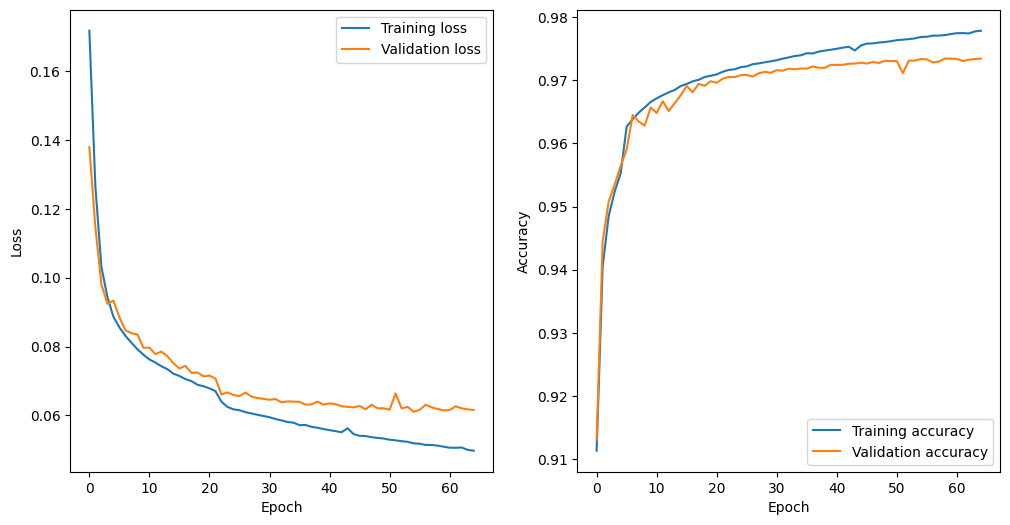

In [ ]:
model_stage3 = unet(input_size=(x, y, 4))
model_stage3.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
history_stage3 = model_stage3.fit(xtrain_stage3, ytrain_stage3, validation_data=(xtrain_val_stage3, ytrain_val_stage3), epochs=100, batch_size=1, callbacks=[early_stopping, model_checkpoint3])

print_graph_history(history_stage3)

In [ ]:
dice_scores = []
for patient, val in images_patient.items():
    if int(patient[-1]) in test_patients or (patient[-1] == '0' and patient[-2] == '1'):
        if (patient[-1] == '0' and patient[-2] == '1'):
          (vt, t1, t2) = load_(val, 10)
          vt = np.where(vt >= 150, 1, 0)
        else:
          (vt, t1, t2) = load_(val, patient[-1])
          vt = np.where(vt >= 150, 1, 0)
        x, y, z = vt.shape
        predictions = np.zeros((x, y, z))
        for count in range(0, z):
            input = np.zeros((1, x, y, 4))
            input[0, :, :, 0] = t1[:, :, count]
            input[0, :, :, 1] = t2[:, :, count]
            prediction = model_stage3.predict(input).reshape((x, y))
            thresholded_prediction = np.where(prediction > 0.5, 1, 0)
            predictions[:, :, count] = thresholded_prediction
        dice_score = dice_coefficient(vt, predictions)
        dice_scores.append(dice_score) 

for di in dice_scores:
  if (di < 0.96):
    print("Dice score is not acceptable")
  print("Dice score : " + str(di))




1/1 [==============================] - 0s 22ms/step
Dice score is not acceptable
Dice score : 0.36519028518204755
Dice score is not acceptable
Dice score : 0.3599998286979474


# Regroupement des prédictions binaires des 3 réseaux et création du fichier final

In [ ]:
predictions_stage1 = np.round(model.predict(xtrain_val)).reshape(sum_vali, x, y)
predictions_stage2 = np.round(model_stage2.predict(xtrain_val_stage2)).reshape(sum_vali, x, y)
predictions_stage3 = np.round(model_stage3.predict(xtrain_val_stage3)).reshape(sum_vali, x, y)

final_predictions = np.zeros((sum_vali, x, y))

final_predictions = 10 * predictions_stage1 + 140 * predictions_stage2 + 100 * predictions_stage3

7/7 [==============================] - 1s 174ms/step


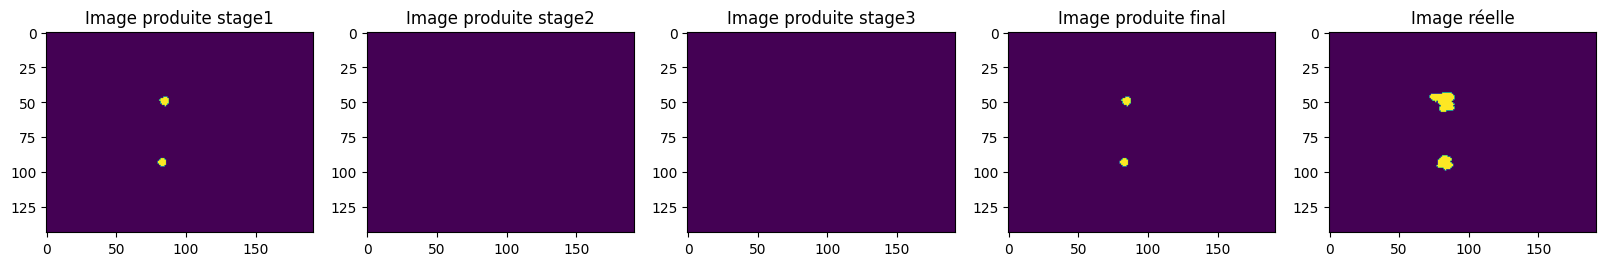

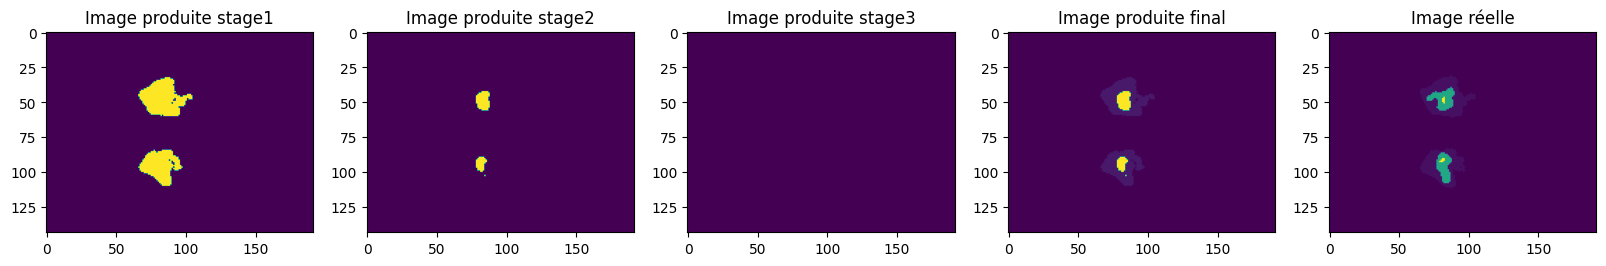

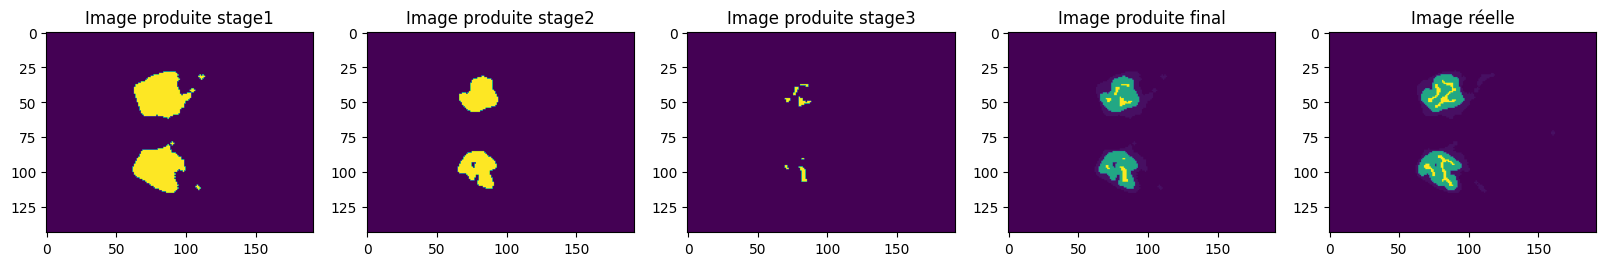

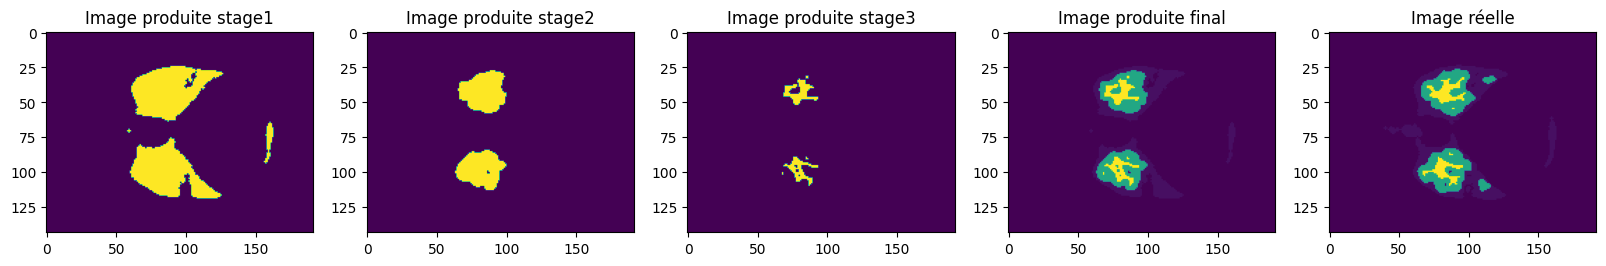

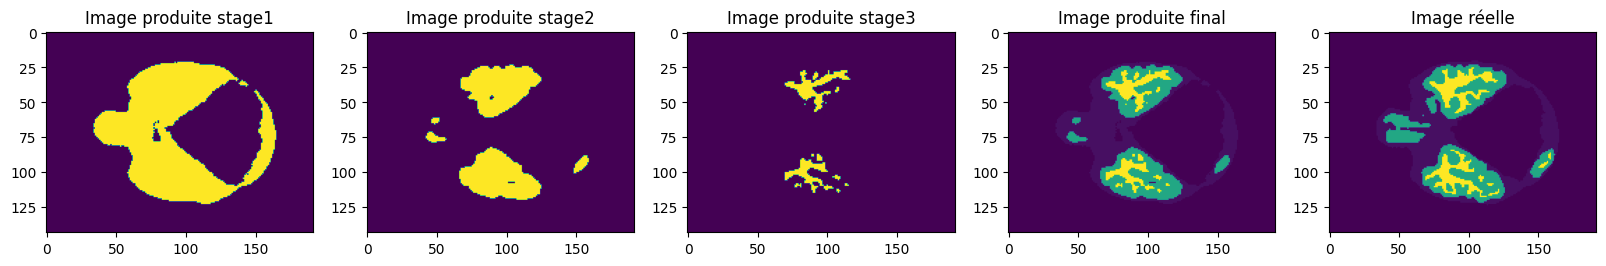

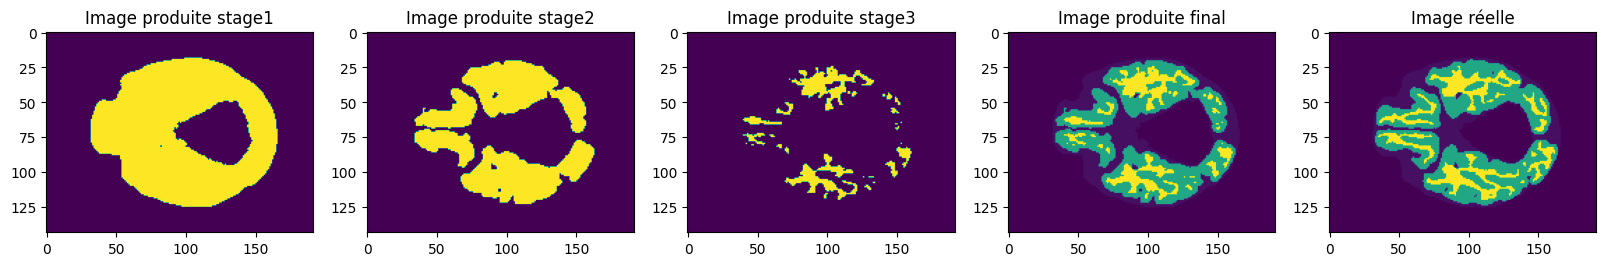

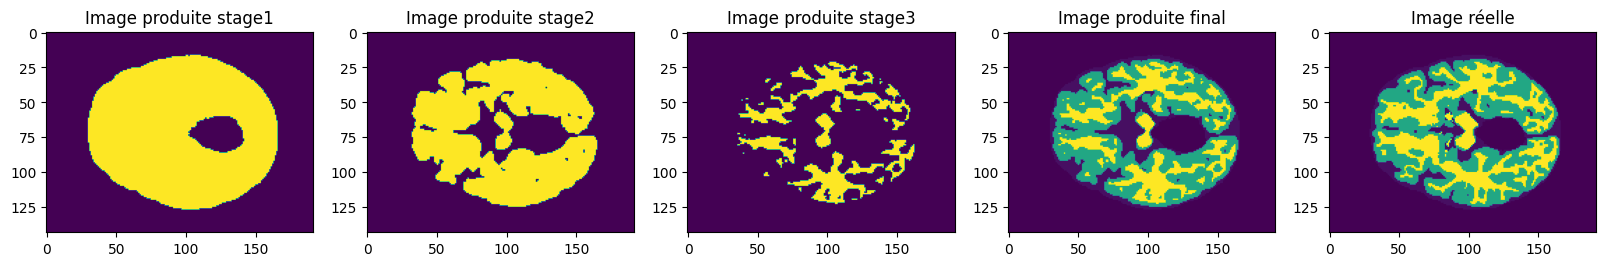

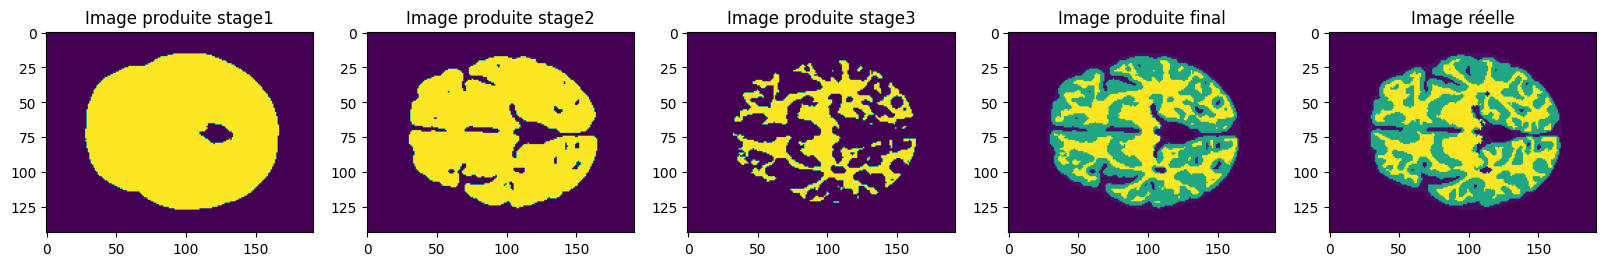

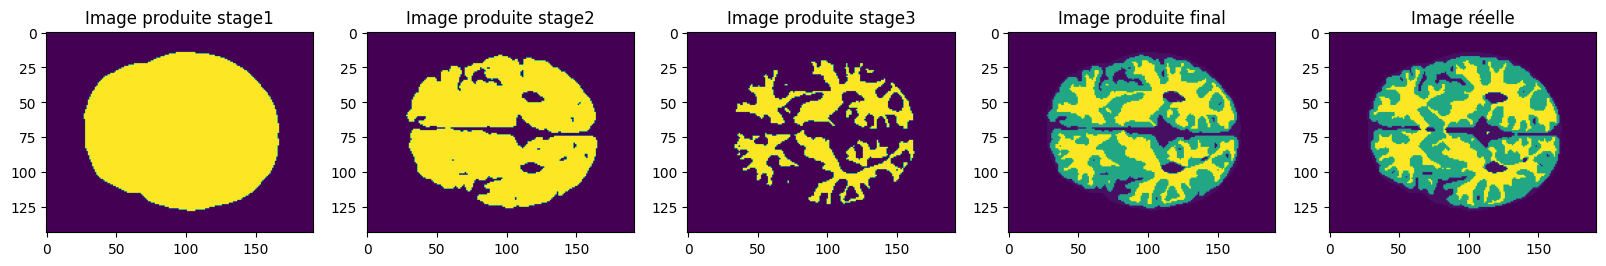

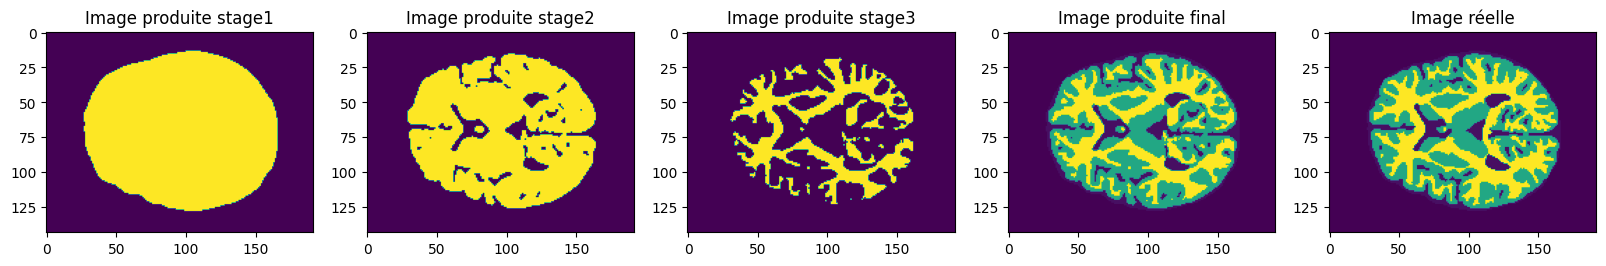

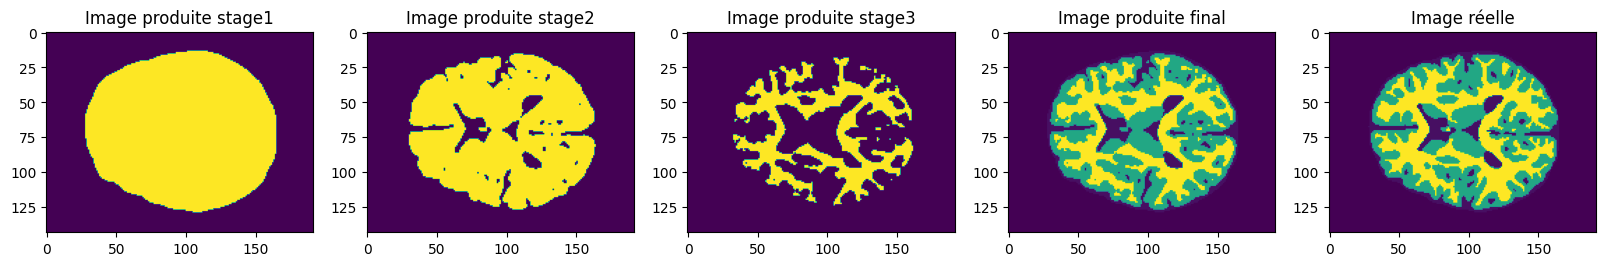

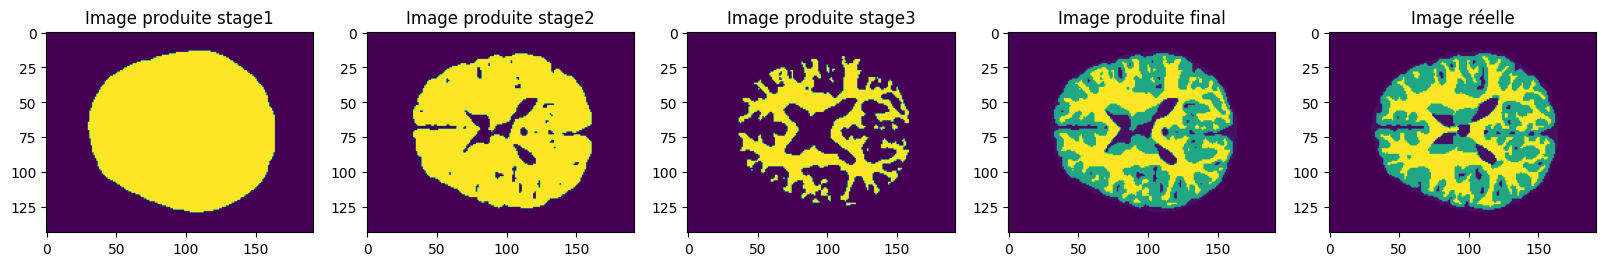

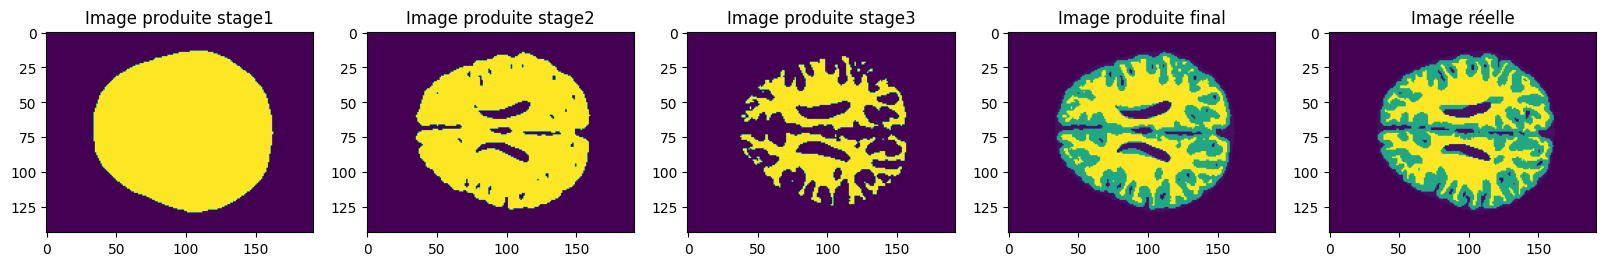

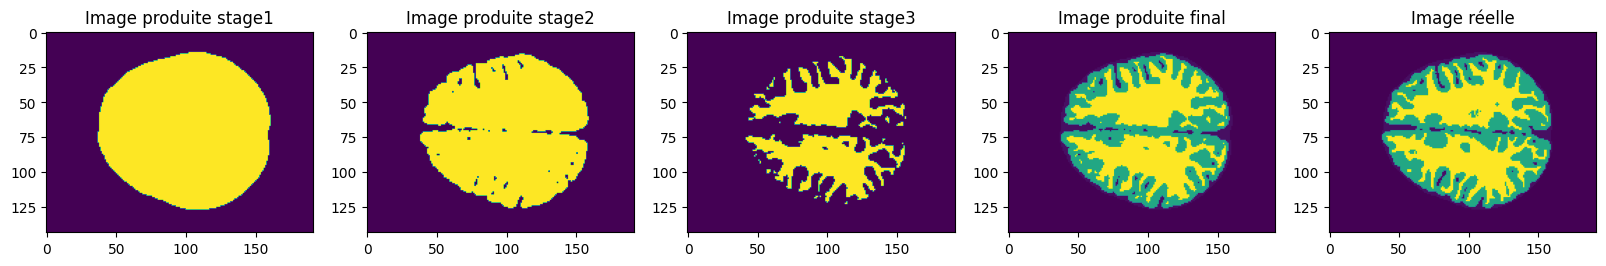

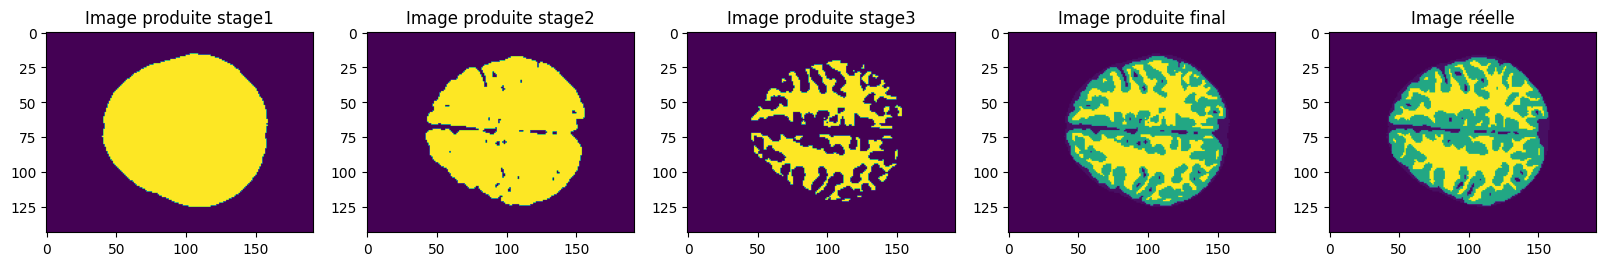

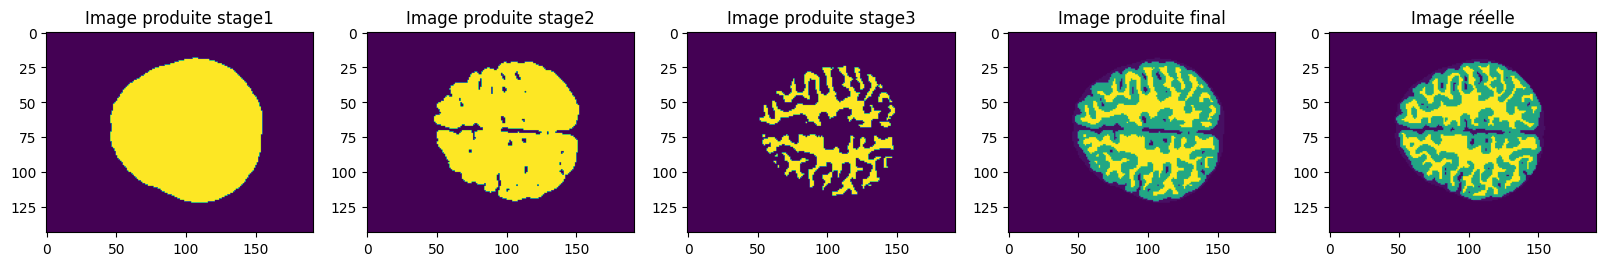

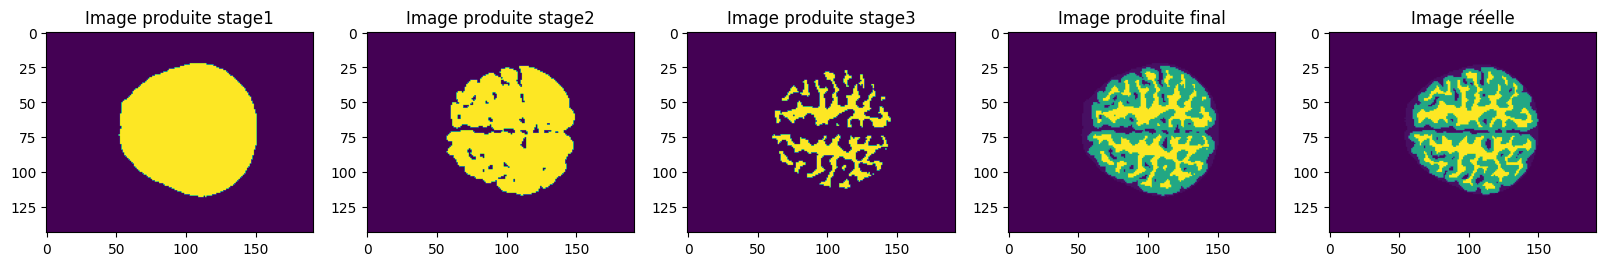

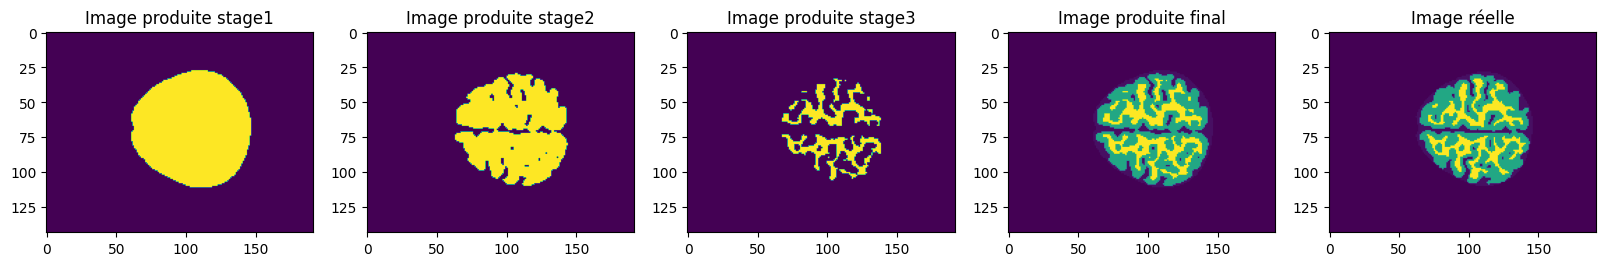

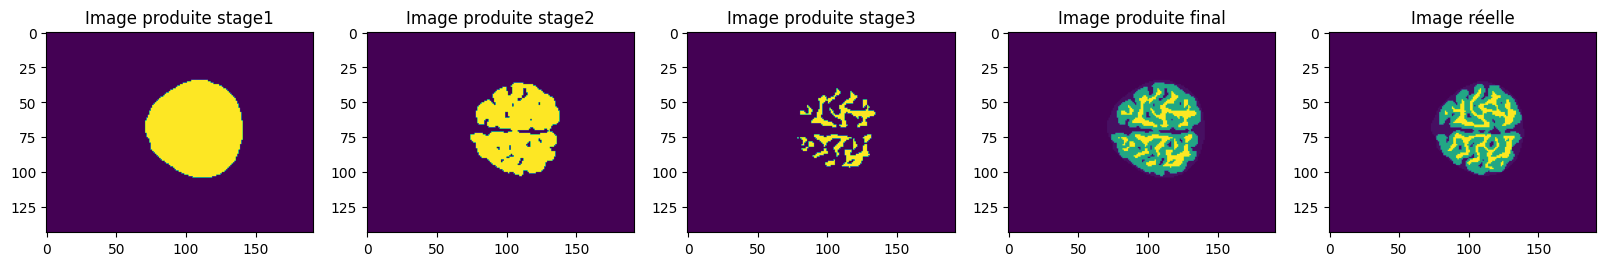

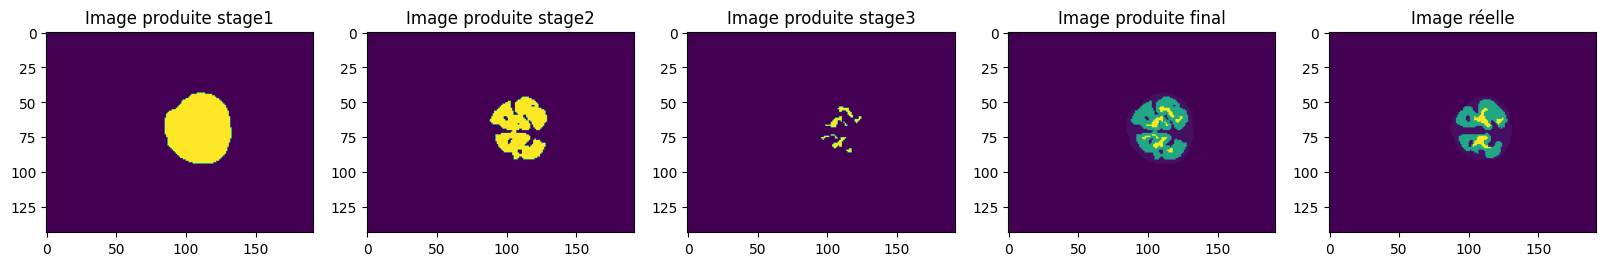

In [ ]:
i = 0
while i < 99:
  expected_output = images_patient["patient7"]["vt_pasnormalisée_img_pt7"][:,:,i + 90]
  fig, axes = plt.subplots(1, 5, figsize=(20, 10))

  axes[0].imshow(predictions_stage1[i])
  axes[0].set_title('Image produite stage1')

  axes[1].imshow(predictions_stage2[i])
  axes[1].set_title('Image produite stage2')

  axes[2].imshow(predictions_stage3[i])
  axes[2].set_title('Image produite stage3')
  
  axes[3].imshow(final_predictions[i])
  axes[3].set_title('Image produite final')
  
  axes[4].imshow(expected_output)
  axes[4].set_title('Image réelle')
  plt.show()
  i = i+5